# [Setup](https://github.com/KMnP/fashionpedia-api)

In [1]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-q5q5nwf1
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-q5q5nwf1
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263915 sha256=2ce5e0f7c459acc916d2a4b8715f078e0f84620ff8c648bf51e75ce5689eaeb5
  Stored in directory: /tmp/pip-ephem-wheel-cache-xbfiyhem/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0.2:
      Successfully uninstalled pycocotools-2.0.2


In [2]:
!pip install fashionpedia

In [3]:
!git clone https://github.com/KMnP/fashionpedia-api.git

Cloning into 'fashionpedia-api'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 101 (delta 42), reused 78 (delta 22), pack-reused 0
Receiving objects: 100% (101/101), 18.13 MiB | 21.79 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [4]:
%cd fashionpedia-api

/content/fashionpedia-api


# Fashionpedia Data Demo
ref: https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

In [5]:
%matplotlib inline

import numpy as np
import os

from fashionpedia.fp import Fashionpedia

In [6]:
anno_file = "data/sample.json"
img_root = "images"

In [7]:
# initialize Fashionpedia api
fp = Fashionpedia(anno_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading attributes...
attributes index created!


In [8]:
# Display the categories and attributes.
# Pls refer to the final data for the final version of categories and attributes
cats = fp.loadCats(fp.getCatIds())
cat_names =[cat['name'] for cat in cats]
print('Fashionpedia categories: \n{}\n'.format('; '.join(cat_names)))

atts = fp.loadAttrs(fp.getAttIds())
att_names = [att["name"] for att in atts]
print('Fashionpedia attributes (first 10): \n{}\n'.format('; '.join(att_names[:10])))

Fashionpedia categories: 
shirt, blouse; top, t-shirt, sweatshirt; sweater; cardigan; jacket; vest; pants; shorts; skirt; coat; dress; jumpsuit; cape; glasses; earmuffs; hat; headband, head covering, hair accessory; tie; glove; watch; belt; leg warmer; tights, stockings; sock; shoe; bag, wallet; scarf; umbrella; hood; collar; lapel; epaulette; sleeve; garment belt; pocket; neckline; buckle; zipper; applique; bead; bow; flower; fringe; ribbon; rivet; ruffle; sequin; tassel

Fashionpedia attributes (first 10): 
classic (t-shirt); polo (shirt); undershirt; henley (shirt); ringer (t-shirt); raglan (t-shirt); rugby (shirt); sailor (shirt); crop (top); halter (top)



In [9]:
# different ways to get image id:
# option 1: get all images containing given categories, and/or given attributes, 
#    select one at random

cat_ids = fp.getCatIds(catNms=['pants','sleeve'])
att_ids = fp.getAttIds(attNms=['regular (collar)'])
# att_ids = fp.getAttIds(attIds=[140, 298]) 
img_ids = fp.getImgIds(catIds=cat_ids)
selected = img_ids[np.random.randint(0, len(img_ids))]
print(selected)

# option 2: get image id randomly from the the anno_file
img_ids = sorted(fp.getImgIds())
selected = img_ids[np.random.randint(0, len(img_ids))]
print(selected)

10223
9813


Segmentation 0:
	Category: shoe
Segmentation 1:
	Category: shoe
Segmentation 2:
	Category: dress
	Attribtues:
		147: knee (length)
		156: wrist-length
		113: symmetrical
		115: fit and flare
		125: circle
		263: gauze
		137: empire waistline
Segmentation 3:
	Category: sleeve
	Attribtues:
		198: set-in sleeve
Segmentation 4:
	Category: sleeve
	Attribtues:
		156: wrist-length
		198: set-in sleeve
Segmentation 5:
	Category: neckline
	Attribtues:
		186: plunging (neckline)


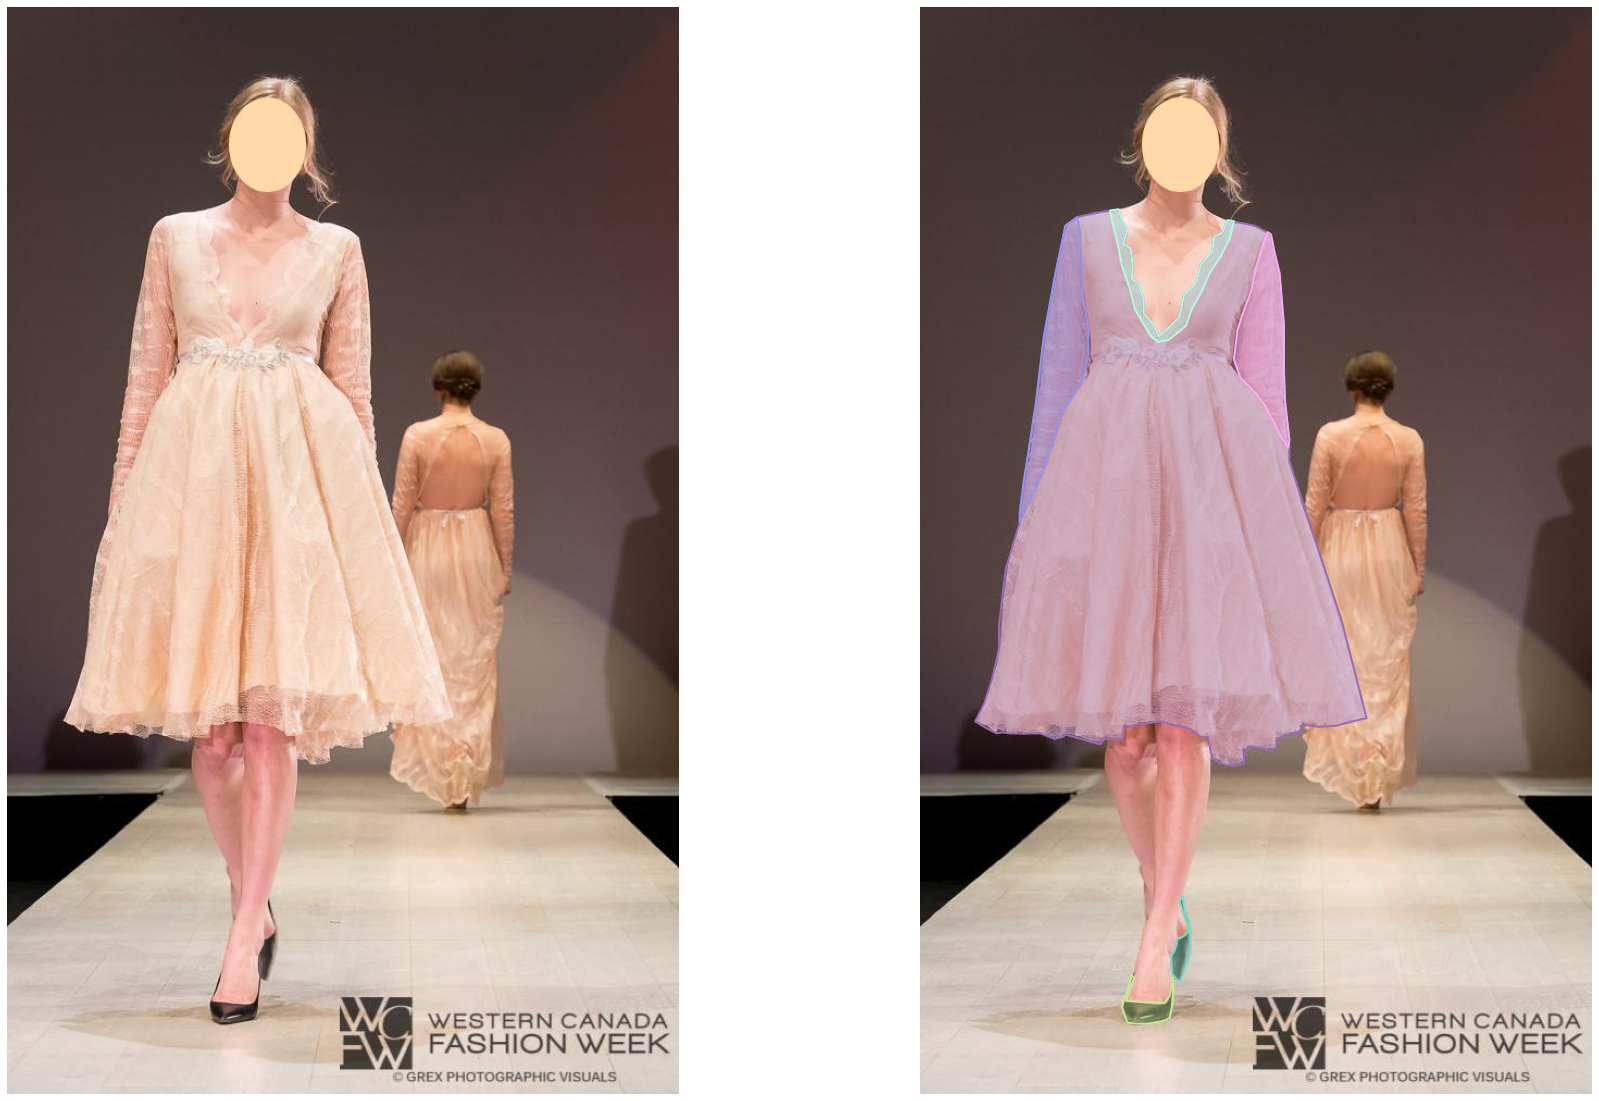

In [10]:
fp.visualize(selected, img_root)

In [11]:
# different ways to get image id:
# option 1: get all images containing given categories, and/or given attributes, 
#    select one at random

#cat_ids = fp.getCatIds(catNms=['pants','sleeve'])
cat_ids = fp.getCatIds(catNms=['dress'])
att_ids = fp.getAttIds(attNms=['regular (collar)'])
# att_ids = fp.getAttIds(attIds=[140, 298]) 
img_ids = fp.getImgIds(catIds=cat_ids)
selected = img_ids[np.random.randint(0, len(img_ids))]
print(selected)

# option 2: get image id randomly from the the anno_file
#img_ids = sorted(fp.getImgIds())
#selected = img_ids[np.random.randint(0, len(img_ids))]
#print(selected)

9813


Segmentation 0:
	Category: dress
	Attribtues:
		147: knee (length)
		156: wrist-length
		113: symmetrical
		115: fit and flare
		125: circle
		263: gauze
		137: empire waistline


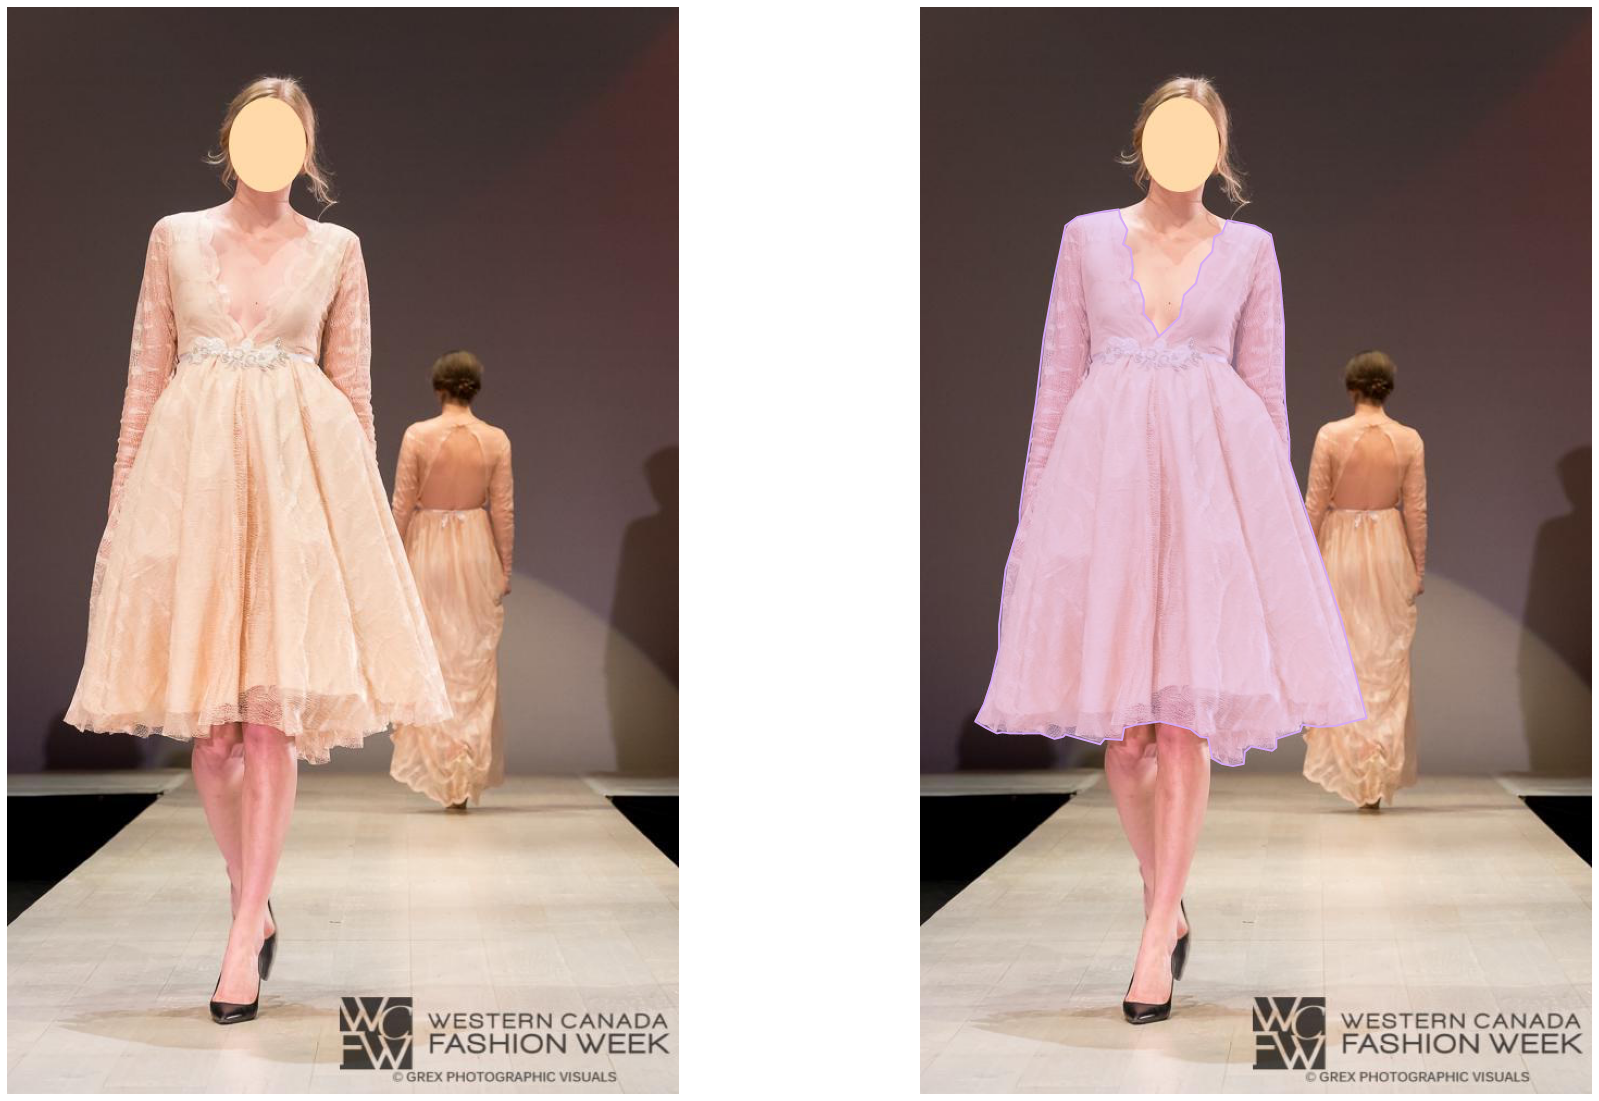

In [12]:
fp.visualize(selected, img_root, cat_ids)

### Note

The Fashionpedia does not own the copyright of the images. The users of the Fashionpedia accept full responsibility for the use of the Fashionpedia dataset, including but not limited to the use of any copies of copyrighted images that they may create from the Fashionpedia.
Check out our [Terms of Use](https://fashionpedia.github.io/home/data_license.html) for more details.